In [130]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots 
from sklearn.linear_model import (LinearRegression , LogisticRegression , Lasso)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS 
from sklearn.model_selection import (train_test_split , GridSearchCV)

In [131]:
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

In [132]:
 #Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

In [133]:
# Read in Data
data = pd.read_csv("./Econ424_F2023_PC6_glassdoor_training_small_v1.csv")
print(data.head())

   overall_rating           firm date_review          job_title  \
0               1            IBM  2008-06-21              Sales   
1               4       Deloitte  2008-06-16                      
2               3            IBM  2008-07-21                      
3               4      Microsoft  2008-08-23    Program Manager   
4               5  Capital-Group  2008-09-18   Business Analyst   

        location                                           headline  \
0  Rochester, NY                                               Good   
1    Toronto, ON            Are you going to send this to Deloitte?   
2  Lexington, MA  Big, slow and complex. A place to hide or a pl...   
3   Bellevue, WA                                   Happy - for now.   
4            NaN   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2 

In [134]:
print(data.columns)

Index(['overall_rating', 'firm', 'date_review', 'job_title', 'location',
       'headline', 'pros', 'cons', 'year', 'small'],
      dtype='object')


In [135]:
print(data['small'].unique())


[1]


In [136]:
data.drop(['small'], axis="columns",inplace=True)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110729 entries, 0 to 110728
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  110729 non-null  int64 
 1   firm            110729 non-null  object
 2   date_review     110729 non-null  object
 3   job_title       110729 non-null  object
 4   location        65101 non-null   object
 5   headline        110607 non-null  object
 6   pros            110729 non-null  object
 7   cons            110729 non-null  object
 8   year            110729 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 7.6+ MB


In [144]:
print(data.head())

   overall_rating           firm date_review          job_title  \
0               1            IBM  2008-06-21              Sales   
1               4       Deloitte  2008-06-16                      
2               3            IBM  2008-07-21                      
3               4      Microsoft  2008-08-23    Program Manager   
4               5  Capital-Group  2008-09-18   Business Analyst   

        location                                           headline  \
0  Rochester, NY                                               Good   
1    Toronto, ON            Are you going to send this to Deloitte?   
2  Lexington, MA  Big, slow and complex. A place to hide or a pl...   
3   Bellevue, WA                                   Happy - for now.   
4            NaN   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2 

In [145]:
df = pd.read_csv("./preprocessed.csv", lineterminator='\n')
print(df.head())

   overall_rating           firm date_review          job_title  \
0               1            IBM  2008-06-21              Sales   
1               4       Deloitte  2008-06-16                      
2               3            IBM  2008-07-21                      
3               4      Microsoft  2008-08-23    Program Manager   
4               5  Capital-Group  2008-09-18   Business Analyst   

        location                                           headline  \
0  Rochester, NY                                               Good   
1    Toronto, ON            Are you going to send this to Deloitte?   
2  Lexington, MA  Big, slow and complex. A place to hide or a pl...   
3   Bellevue, WA                                   Happy - for now.   
4            NaN   stable company, fair compensation, great culture   

                                                pros  \
0              close home save transportation cost .   
1                 high standard lot good people work   
2 

In [146]:
# Specify the columns you want to check for missing values
columns_to_check = ['pros', 'cons', 'headline']

# Check for missing values in the specified columns

df = df.dropna(subset=columns_to_check)
missing_values = df[columns_to_check].isna()
rows_with_missing_values = df[missing_values.any(axis=1)]
print(len(rows_with_missing_values))

0


In [147]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [148]:
df['pros'] = df['pros'].astype(str)
df['cons'] = df['cons'].astype(str)


In [164]:
df.count()

overall_rating        110593
firm                  110593
date_review           110593
job_title             110593
location               65038
headline              110593
pros                  110593
cons                  110593
year                  110593
small                 110593
pros_length           110593
cons_length           110593
headline_sentiment    110593
pros_sentiment        110593
cons_sentiment        110593
dtype: int64

In [150]:
# Feature construction
df['pros_length'] = df['pros'].apply(len)
df['cons_length'] = df['cons'].apply(len)
df['headline_sentiment'] = df['headline'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])
df['pros_sentiment'] = df['pros'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])


In [151]:
df['cons_sentiment'] = df['cons'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])

In [169]:
print(df["headline_sentiment"].isna().values.any())
print(df["pros_sentiment"].isna().values.any())
print(df["cons_sentiment"].isna().values.any())


False
False
False


In [153]:
# output to csv file
csv_file_out = "./postsentiment.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_out,index=False, encoding="utf-8", float_format="%1.6f")

In [201]:
df = pd.read_csv("./postsentiment.csv", lineterminator='\n')
print(data.head())

   overall_rating           firm date_review          job_title  \
0               1            IBM  2008-06-21              Sales   
1               4       Deloitte  2008-06-16                      
2               3            IBM  2008-07-21                      
3               4      Microsoft  2008-08-23    Program Manager   
4               5  Capital-Group  2008-09-18   Business Analyst   

        location                                           headline  \
0  Rochester, NY                                               Good   
1    Toronto, ON            Are you going to send this to Deloitte?   
2  Lexington, MA  Big, slow and complex. A place to hide or a pl...   
3   Bellevue, WA                                   Happy - for now.   
4            NaN   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2 

In [203]:
df['overall_rating']

0         1
1         4
2         3
3         4
4         5
         ..
110588    4
110589    4
110590    2
110591    3
110592    4
Name: overall_rating, Length: 110593, dtype: int64

In [204]:
# Features and target variable
features = ['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment']
target = 'overall_rating'

In [205]:
df.drop(columns=["location"],inplace=True)

In [206]:
# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [207]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [208]:
# Train the NLP model
modelBasic = MLPRegressor(random_state=42)
modelBasic.fit(train_df[features], train_df[target])

MLPRegressor(random_state=42)

In [209]:
# Make predictions
train_predictions = np.clip(modelBasic.predict(train_df[features]), 1, 5)
test_predictions = np.clip(modelBasic.predict(test_df[features]), 1, 5)

In [210]:
# Assess the model's performance
train_mse = mean_squared_error(train_df[target], train_predictions)
test_mse = mean_squared_error(test_df[target], test_predictions)

train_r2 = r2_score(train_df[target], train_predictions)
test_r2 = r2_score(test_df[target], test_predictions)

In [211]:
# Display results
print(f"Training MSE: {train_mse}, Training R^2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}")

Training MSE: 0.8568652538743239, Training R^2: 0.38719892769900255
Test MSE: 0.8490298151226802, Test R^2: 0.3966369701262923


In [213]:
# Create training and test sets
X = df[['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment']]
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building with Sigmoid Neuron
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', max_iter=500, solver='adam')
model.fit(X_train, y_train)

# Make predictions
y_train_pred = np.clip(model.predict(X_train),1, 5)
y_test_pred = np.clip(model.predict(X_test),1,5)

# Model Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

# Print MSE and R2 for the training set
print(f'MSE (Training Set): {mse_train}')
print(f'R2 Score (Training Set): {r2_train}')

MSE (Training Set): 0.8214836108632233
R2 Score (Training Set): 0.41250268307820426


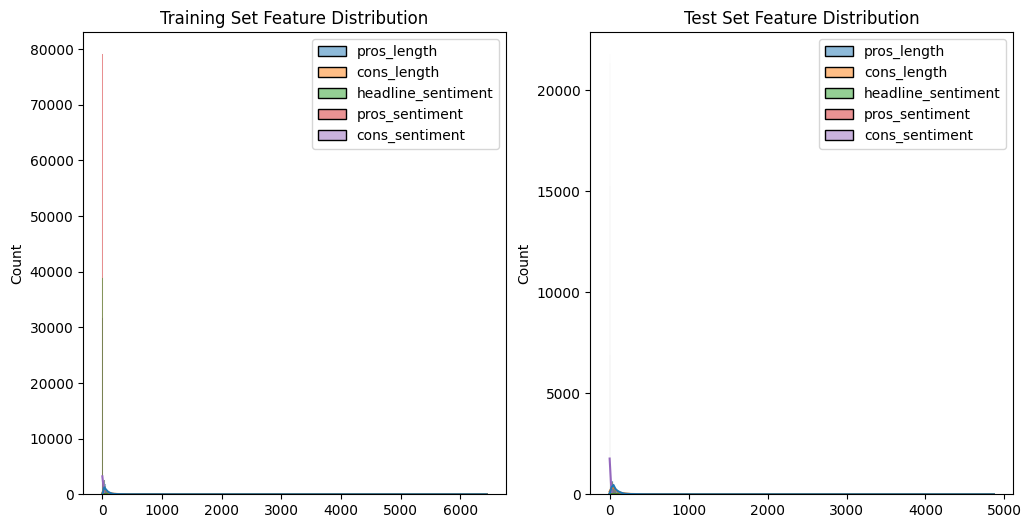

In [214]:
# Graphs
# Distribution of each feature in the training set and test set
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(X_train, ax=axes[0], kde=True)
axes[0].set_title('Training Set Feature Distribution')
sns.histplot(X_test, ax=axes[1], kde=True)
axes[1].set_title('Test Set Feature Distribution')
plt.show()

In [199]:
df["overall_rating"].unique()

[1, 4, 3, 5, 2]
Categories (5, int64): [1, 2, 3, 4, 5]

In [186]:
y_test_pred

array([3.22801438, 4.22200457, 2.00491649, ..., 4.33257762, 3.39935048,
       2.87712577])

In [220]:
dataPred = pd.read_csv("./Econ424_F2023_PC6_glassdoor_test_without_response_variable_v1.csv")
print(dataPred.head())



   overall_rating                     firm date_review  \
0             NaN              Blue-Yonder  2020-09-25   
1             NaN               McDonald-s  2020-09-02   
2             NaN  University-of-Sheffield  2020-12-13   
3             NaN               McDonald-s  2020-08-20   
4             NaN            DFS-Furniture  2020-08-11   

                          job_title                     location  \
0                    Vice President               Scottsdale, AZ   
1          Administrative Assistant          King of Prussia, PA   
2                     PhD Candidate  Sheffield, England, England   
3                     Kitchen Staff         Woodlands New Town,    
4   Customer Service Representative     London, England, England   

                 headline                                               pros  \
0        Amazing Culture!  The culture at BY is like none other, over the...   
1     Amazing experience.  The best reason to work with McDonald's is mos...   
2 

In [221]:
dataPred.drop(['overall_rating','small','year'], errors='ignore',
  axis='columns', inplace=True)
dataPred.shape

(56976, 7)

In [222]:
# Specify the columns you want to check for missing values
columns_to_check = ['pros', 'cons', 'headline']

# Check for missing values in the specified columns

dataPred[columns_to_check].isna().any()



pros        False
cons        False
headline     True
dtype: bool

In [223]:
# Feature construction
dataPred['pros_length'] = dataPred['pros'].apply(len)
dataPred['cons_length'] = dataPred['cons'].apply(len)
dataPred['headline_sentiment'] = dataPred['headline'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])
dataPred['pros_sentiment'] = dataPred['pros'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])


In [224]:
dataPred['cons_sentiment'] = dataPred['cons'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])


In [225]:
dataPred = dataPred[["pros_length", 'cons_length','headline_sentiment','pros_sentiment','cons_sentiment']]
Y_test_pred = np.clip(model.predict(dataPred),1,5)


In [226]:
# output to csv file
csv_file_out = "./output.csv"

# Save the DataFrame to a CSV file
np.savetxt(csv_file_out, Y_test_pred, delimiter="\n", fmt="%1.6f")

In [227]:
print(len(Y_test_pred))
print(len(dataPred))

56976
56976


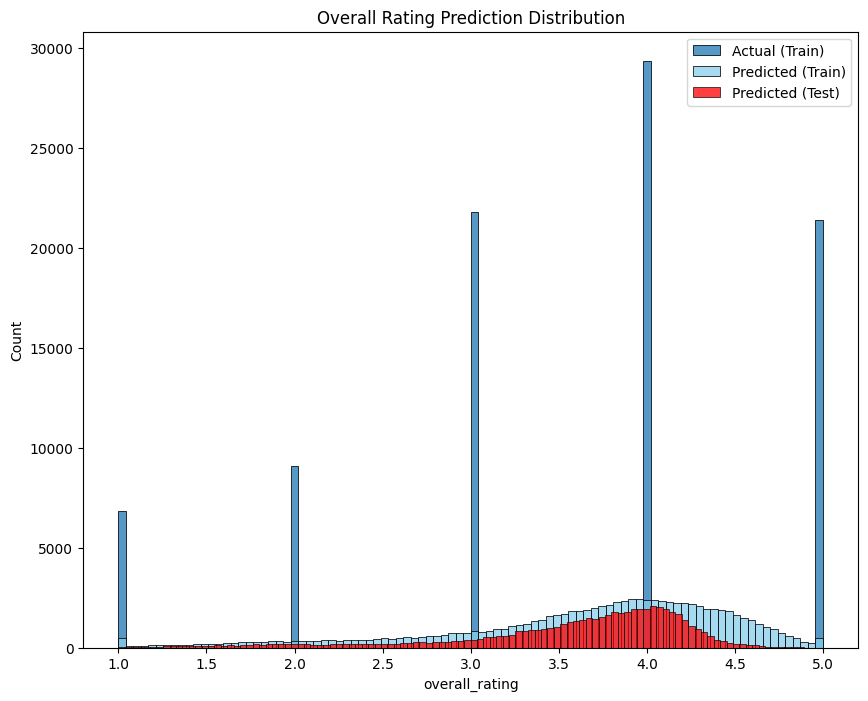

In [235]:
# Consolidated prediction distribution graph
fig, axes = plt.subplots(figsize=(10, 8))
# Plot prediction distributions for actual and predicted values in training and test sets
sns.histplot(y_train, label='Actual (Train)', ax=axes, kde=False)
sns.histplot(train_predictions, label='Predicted (Train)', ax=axes, kde=False, color="skyblue")
sns.histplot(Y_test_pred, label='Predicted (Test)', ax=axes, kde=False, color="red")

axes.set_title('Overall Rating Prediction Distribution')
axes.legend()

# Save the figure
plt.savefig('consolidated_prediction_distributions.png')
plt.show()

In [240]:
import math

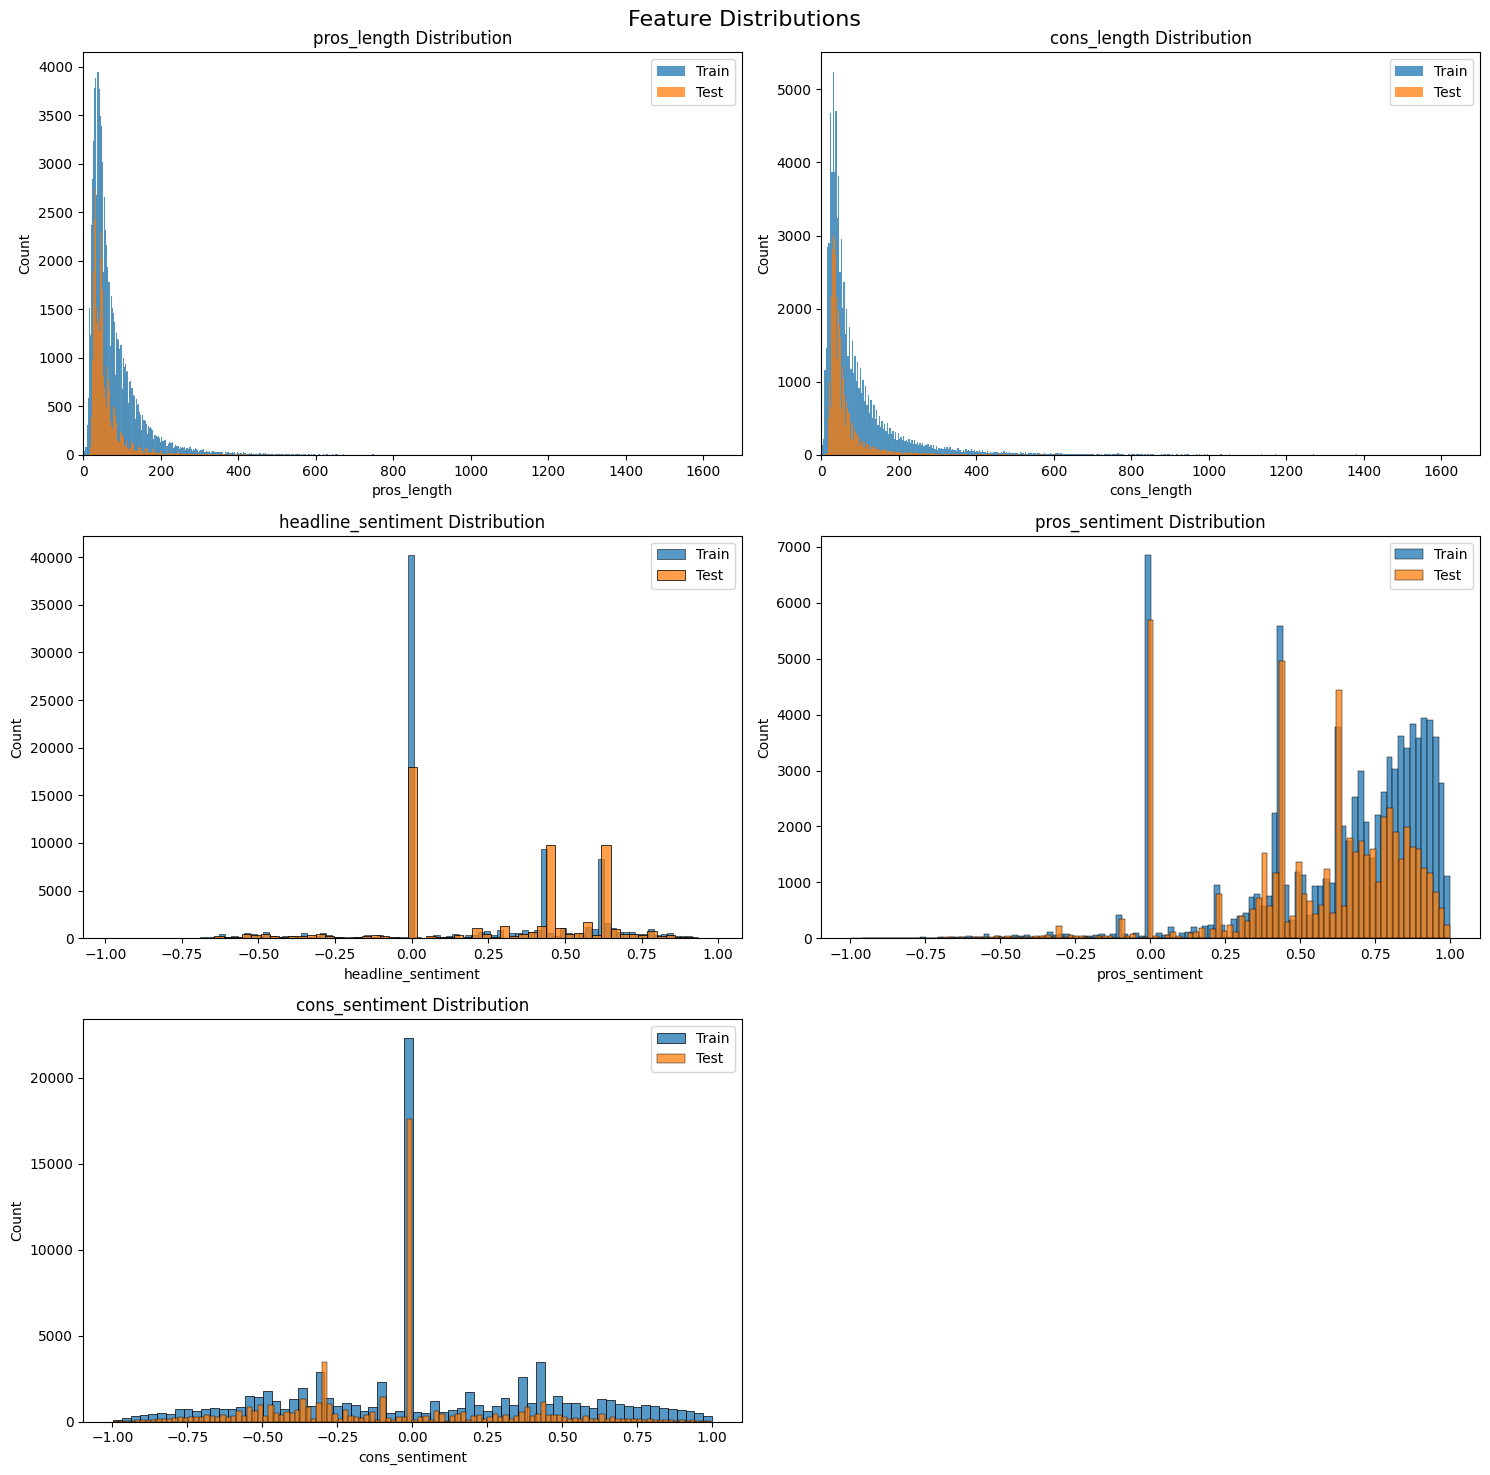

In [251]:
# Consolidated feature distribution graph
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Feature Distributions', fontsize=16)

# Plot feature distributions for training and test sets
for i, feature in enumerate(features):
    
    x = math.floor(i/2)
    y = i%(2)
    sns.histplot(train_df[feature], ax=axes[x, y],label='Train', kde=False)
    sns.histplot(dataPred[feature], ax=axes[x, y],label='Test', kde=False)
    axes[x, y].set_title(f'{feature} Distribution')
    axes[x, y].legend()
axes[0, 0].set_xlim(0, 1700)
axes[0, 1].set_xlim(0, 1700)  
# Remove the empty subplot in the last row and second column
fig.delaxes(axes[2, 1])

# Adjust layout to prevent clipping of titles
fig.tight_layout()

# Save the figure
plt.savefig('consolidated_feature_distributions.png')
plt.show()

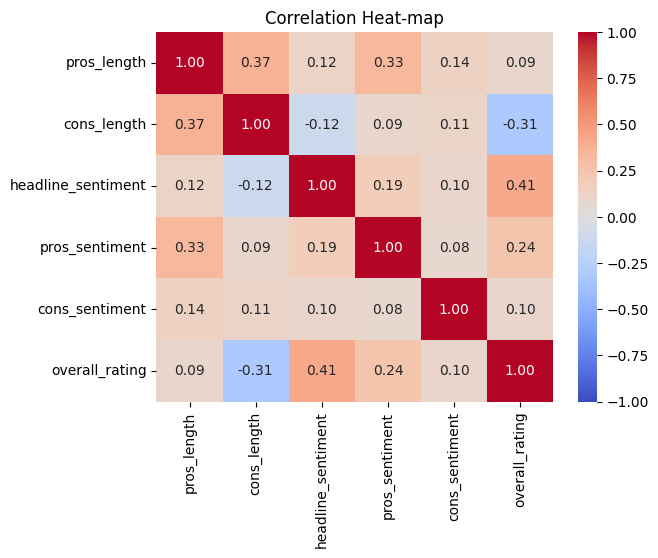

In [236]:
# Correlation heat-map
correlation_matrix = df[['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment', 'overall_rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heat-map')
plt.show()